In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
df=pd.read_csv("C:\\Users\\saran\\Desktop\\ML\\Regression\\house_price_regression_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
df.shape

(1000, 8)

In [5]:
df.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [6]:
df.tail(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [7]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [8]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


MULTIPLE REGRESSION


In [9]:
# DIVIDING DATA INTO DEPENDENTS AND INDEPENDENTS
x=df.drop("House_Price",axis=1)
y=df["House_Price"]

In [10]:
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [11]:
y

0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

TRAIN TEST SPLIT

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
len(x_train)

800

In [14]:
len(x_test)

200

In [15]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

LR MODEL

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
#Predictions
y_pred=model.predict(x_test)

In [18]:
# Sorting
y_test_sorted = np.array(y_test)
y_pred_sorted = np.array(y_pred)
order = y_test_sorted.argsort()

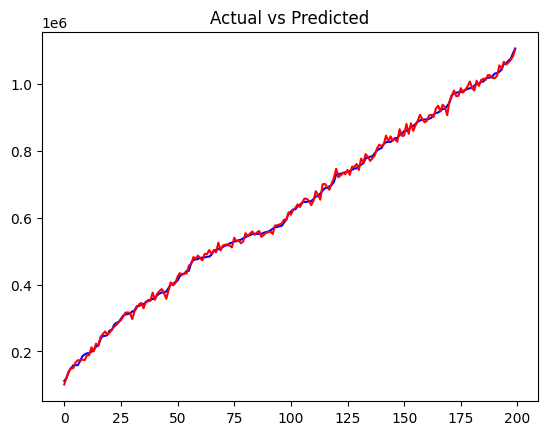

In [19]:
#Plotting graph to compare
plt.plot(y_test_sorted[order],color='blue',label='test')
plt.plot(y_pred_sorted[order],color='red',label='predicted')
plt.title("Actual vs Predicted")
plt.show()

THIS GRAPH DEPICTS HOW CLOSE OUR MODEL PREDICTS TO THE ACTUAL VALUES

SIMPLE LINEAR REGRESSION

In [20]:
x1=df[["Square_Footage"]]
y1=df[["House_Price"]]

TRAIN TEST SPLIT

In [21]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2)

In [22]:
x1_train

,Square_Footage
71,879
202,2182
317,3551
741,2548
678,3586
...,...
876,3868
204,1654
275,2395
474,1888


In [23]:
y1_train

,House_Price
71,217010.485267
202,470978.479533
317,740281.215345
741,574912.766232
678,724033.560457
...,...
876,864309.032358
204,417416.262254
275,534533.020037
474,477884.316930


LR MODEL

In [24]:
model1=LinearRegression()
model1.fit(x1_train,y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y1_pred=model1.predict(x1_test)

In [26]:
x1_test=x1_test.values.reshape(-1)
y1_test = np.array(y1_test).reshape(-1)
y1_pred = np.array(y1_pred).reshape(-1)
order = np.argsort(x1_test)

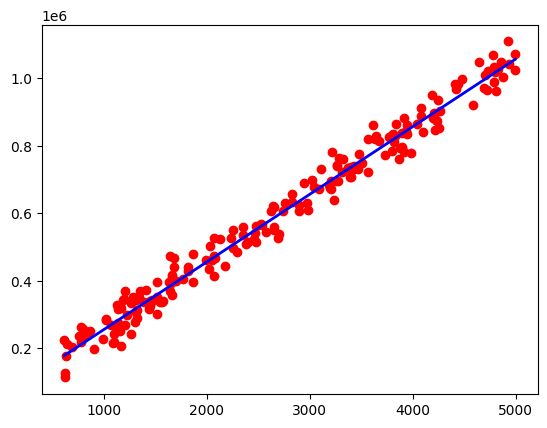

In [27]:
plt.scatter(x1_test, y1_test,color='red', label='Actual')
plt.plot(x1_test[order], y1_pred[order], color='blue',label='Prediction', linewidth=2)
plt.show()

THIS GRAPH DEPICTS THE REGRESSION LINE ALONG THE SCATTERED DATA POINTS

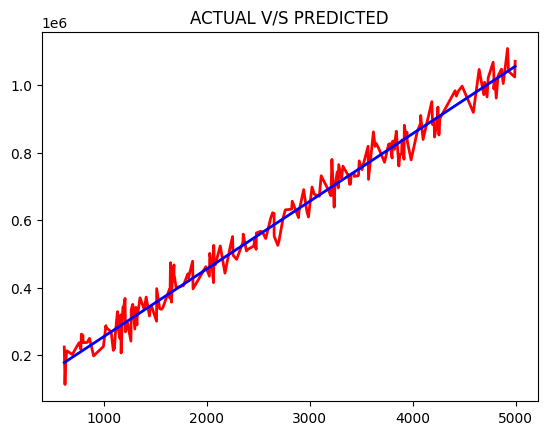

In [28]:
plt.plot(x1_test[order], y1_test[order], color='red',label='Test', linewidth=2)
plt.plot(x1_test[order], y1_pred[order], color='blue',label='Prediction', linewidth=2)
plt.title("ACTUAL V/S PREDICTED")
plt.show()

THIS GRAPH DEPICTS ACTUAL VS PREDICTED VALUES BY MODEL. #### here x_test is sorted

WE GET THAT SQUARE FOOTAGE HAVE STRONG RELATIONSHIP WITH HOUSE PREDICTIONS.

Now, We will compare the Number of Bedrooms to House Price [Simple linearr regression]

In [29]:
x2 = df[["Num_Bedrooms"]]
y2 = df[["House_Price"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [30]:
x2

,Num_Bedrooms
0,2
1,3
2,1
3,1
4,2
...,...
995,4
996,1
997,4
998,5


In [31]:
y2

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [32]:
X2_train

,Num_Bedrooms
29,2
535,5
695,2
557,4
836,5
...,...
106,5
270,3
860,5
435,4


In [33]:
y2_train

,House_Price
29,434165.896634
535,788284.690202
695,985499.196316
557,736289.124555
836,636552.752485
...,...
106,501305.548994
270,797034.425504
860,360372.978039
435,478566.065591


In [34]:
#LR MODEL
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Prepare arrays for prediction (sklearn expects 2D)
x2_test_arr = X2_test['Num_Bedrooms'].values.reshape(-1, 1)
y2_test_arr = y2_test.values.reshape(-1)

In [55]:
#PREDICT 
y2_pred_arr = model2.predict(x2_test_arr).reshape(-1)

In [37]:
# Build DataFrame and compute mean by bedroom count
tmp = pd.DataFrame({
    'Num_Bedrooms': x2_test_arr.reshape(-1),
    'Actual': y2_test_arr,
    'Predicted': y2_pred_arr
})

grouped = tmp.groupby('Num_Bedrooms').mean().reset_index()

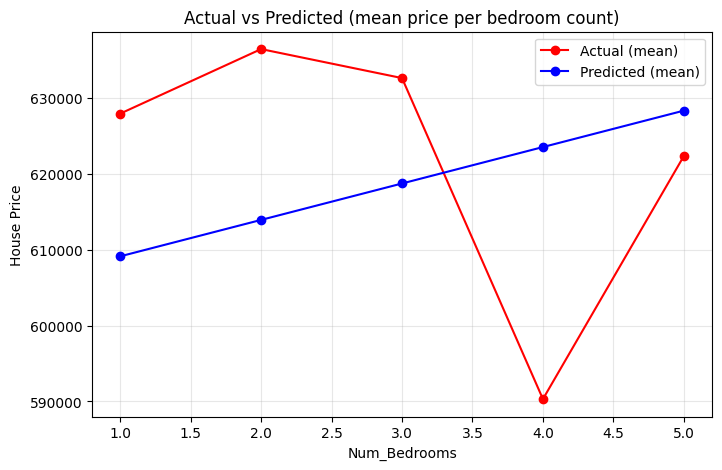

In [38]:
plt.figure(figsize=(8,5))
plt.plot(grouped['Num_Bedrooms'], grouped['Actual'], marker='o', linestyle='-', color='red', label='Actual (mean)')
plt.plot(grouped['Num_Bedrooms'], grouped['Predicted'], marker='o', linestyle='-', color='blue', label='Predicted (mean)')
plt.xlabel('Num_Bedrooms')
plt.ylabel('House Price')
plt.title('Actual vs Predicted (mean price per bedroom count)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

This graph is like this because no. of rooms are in range 1-5.

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
print("For multiple regression model (Model 0):")
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
r2= r2_score(y_test,y_pred)
print("R2 Score:",r2)

For multiple regression model (Model 0):
MAE: 7671.727690550438
MSE: 88792542.42250131
RMSE: 9422.979487534785
R2 Score: 0.9987290641774811


In [41]:
print("For simple linear regression model (Model 1)[Square footage]:")
print("MAE:",mean_absolute_error(y1_test,y1_pred))
print("MSE:",mean_squared_error(y1_test,y1_pred))
print("RMSE:",np.sqrt(mean_squared_error(y1_test,y1_pred)))
r2_1= r2_score(y1_test,y1_pred)
print("R2 Score:",r2_1)

For simple linear regression model (Model 1)[Square footage]:
MAE: 28864.623433337565
MSE: 1235508827.704275
RMSE: 35149.80551445875
R2 Score: 0.9811053029957008


In [42]:
print("For simple linear regression model (Model 2)[Num of bedrooms]:")
print("MAE:",mean_absolute_error(y2_test,y2_pred_arr))
print("MSE:",mean_squared_error(y2_test,y2_pred_arr))
print("RMSE:",np.sqrt(mean_squared_error(y2_test,y2_pred_arr)))
r2_2= r2_score(y2_test,y2_pred_arr)
print("R2 Score:",r2_2)

For simple linear regression model (Model 2)[Num of bedrooms]:
MAE: 219699.4297764638
MSE: 64627307902.345764
RMSE: 254219.01561910307
R2 Score: -0.00261330752276967


Therefore we can infer that Square footage is directly proportional to house price but num of bedrooms have literally no relation with house price

In [50]:
from sklearn.linear_model import Ridge, Lasso

# Apply Ridge Regression
ridge_model=Ridge(alpha=100)   # for all alpha values r2 score is same
ridge_model.fit(x_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)
r2_model_ridge=r2_score(y_test,y_pred)
print("R2 Score of ridge model (ridge multiple regression):",r2_model_ridge)

R2 Score of ridge model (ridge multiple regression): 0.9987290641774811


In [64]:
#Apply Lasso Regression

lasso_model=Lasso(alpha=100)   # for all aplha values r2 score is same
lasso_model.fit(x_train,y_train)
y_pred_lasso=lasso_model.predict(x_test)
r2_model_lasso=r2_score(y_test,y_pred)
print("R2 Score of lasso model (lasso multiple regression):", r2_model_lasso)

R2 Score of lasso model (lasso multiple regression): 0.9987290641774811


The R² score of the Ridge and Lasso models is identical to the standard Linear Regression model. This indicates that the dataset does not suffer from multicollinearity or coefficient instability. Since the features are not highly correlated and the model is already generalizing well, regularization does not provide any improvement.